# Coursera Machine Learning EX2

## Logistic Regression without Regularization

Import some modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


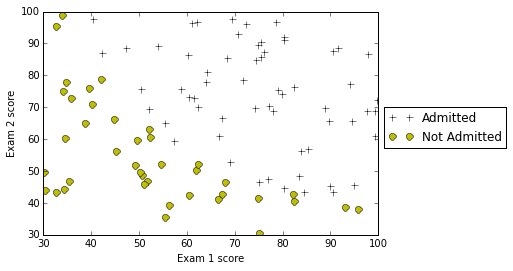

In [2]:
data = np.loadtxt('datasets/ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

print 'Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.'

# Find Indices of Positive and Negative Examples
pos = np.nonzero(y == 1)
neg = np.nonzero(y == 0)

# Plot Examples
plt.plot(X[pos][:, 0], X[pos][:, 1], 'k+', linewidth=2, markersize=7, label='Admitted')
plt.plot(X[neg][:, 0], X[neg][:, 1], 'ko', markerfacecolor='y', markersize=7, label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(bbox_to_anchor=(1.4, 0.6))
plt.show()

Define functions for logistic regression

In [3]:
def sigmoid(z):
    ones = np.ones_like(z)
    g = ones / (ones + np.exp(-z))
    return g

In [4]:
def computeLogisticParts(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    pos = np.vdot(y, np.log(h)) # computes summation also
    neg = np.vdot((1-y), np.log(1-h)) # computes summation also
    
    return h, pos, neg

In [5]:
def computeCost(theta, X, y):
    m, n = X.shape
    h, pos, neg = computeLogisticParts(theta, X, y)

    J = (pos + neg) / (-m)
    return J

In [6]:
def computeGrad(theta, X, y):
    m, n = X.shape
    h, pos, neg = computeLogisticParts(theta, X, y)

    grad = np.dot((h - y), X) / m
    return grad

In [7]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X_int = (np.hstack((np.ones((m, 1)), X)))

# Initialize fitting parameters
initial_theta = np.zeros(n+1)

# Compute and display initial cost and gradient
cost = computeCost(initial_theta, X_int, y)
grad = computeGrad(initial_theta, X_int, y)

print 'Cost at initial theta (zeros): ', cost
print 'Gradient at initial theta (zeros): ', grad

Cost at initial theta (zeros):  0.69314718056
Gradient at initial theta (zeros):  [ -0.1        -12.00921659 -11.26284221]


In [8]:
import scipy.optimize as optim

#[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);
res = optim.fmin_tnc(func=computeCost, x0=initial_theta, fprime=computeGrad, args=(X_int, y))
theta = res[0]
cost = computeCost(theta, X_int, y)

# Print theta to screen
print 'Cost at theta found by fminunc: ', cost
print 'theta: ', theta

Cost at theta found by fminunc:  0.203571345199
theta:  [-25.8735615    0.21193687   0.20722589]


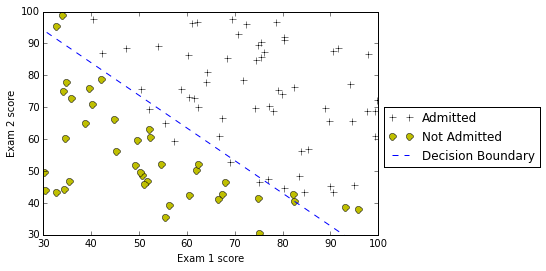

In [9]:
# Plot Examples
plt.plot(X[pos][:, 0], X[pos][:, 1], 'k+', linewidth=2, markersize=7, label='Admitted')
plt.plot(X[neg][:, 0], X[neg][:, 1], 'ko', markerfacecolor='y', markersize=7, label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Plot the decision boundary
# Take two points from the Exam 1 Score feature
x_plot = np.hstack((X[:,1].min()-2, X[:,1].max()+2))
y_plot = -(theta[0] / theta[2]) - (theta[1] / theta[2])*x_plot
plt.plot(x_plot, y_plot, '--', label='Decision Boundary')
plt.legend(bbox_to_anchor=(1.5, 0.6))

plt.axis([30, 100, 30, 100])
plt.show()

In [10]:
def predict(theta, X):
    probabilities = sigmoid(np.dot(X_int, theta))
    return [1 if p >= 0.5 else 0 for p in probabilities]

In [11]:
prob = sigmoid(np.vdot(np.array([1, 45, 85]), theta))
print 'For a student with scores 45 and 85, we predict an admission probability of ', prob

# Compute accuracy on our training set
p = zip(predict(theta, X), y)
results = [1 if a == b else 0 for (a, b) in p]
print 'Train Accuracy: ', float(sum(results)) / float(len(results))

For a student with scores 45 and 85, we predict an admission probability of  0.782074807806
Train Accuracy:  0.89


## Logistic Regression with Regularization

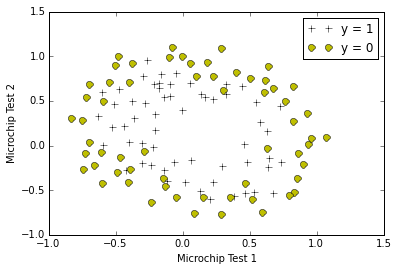

In [12]:
dataReg = np.loadtxt('datasets/ex2data2.txt', delimiter=',')
X = dataReg[:, 0:2]
y = dataReg[:, 2]

# Find Indices of Positive and Negative Examples
pos = np.nonzero(y == 1)
neg = np.nonzero(y == 0)

# Plot Examples
plt.plot(X[pos][:, 0], X[pos][:, 1], 'k+', linewidth=2, markersize=7, label='y = 1')
plt.plot(X[neg][:, 0], X[neg][:, 1], 'ko', markerfacecolor='y', markersize=7, label='y = 0')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.show()

In [13]:
def mapFeature(X1, X2, degree):
    m = X1.shape[0]
    out = np.ones_like(X1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.vstack(( out, (X1**(i-j)) * (X2**j) ))
            
    return out.T

In [14]:
def computeCostReg(theta, X, y, reg_lambda):
    m, n = X.shape
    temp_theta = theta
    temp_theta[0] = 0
    J = computeCost(theta, X, y)
    J = J + (reg_lambda / (2 * m)) * (np.vdot(temp_theta, temp_theta))
    return J

In [15]:
def computeGradReg(theta, X, y, reg_lambda):
    m, n = X.shape
    temp_theta = theta
    temp_theta[0] = 0
    grad = computeGrad(theta, X, y)
    grad = grad + (reg_lambda / m) * temp_theta
    return grad

In [16]:
X_reg = mapFeature(X[:,0], X[:,1], 6)
print 'X.shape =', X.shape, ', y.shape =', y.shape
print 'X_reg.shape =', X_reg.shape

# Initialize fitting parameters
initial_theta = np.zeros(X_reg.shape[1])

# Set regularization parameter lambda to 1
reg_lambda = 1

cost = computeCostReg(initial_theta, X_reg, y, reg_lambda)
grad = computeGradReg(initial_theta, X_reg, y, reg_lambda)

print 'Cost at initial theta (zeros): ', cost

X.shape = (118, 2) , y.shape = (118,)
X_reg.shape = (118, 28)
Cost at initial theta (zeros):  0.69314718056


In [17]:
#[theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);
res = optim.fmin_tnc(func=computeCostReg, x0=initial_theta, fprime=computeGradReg, args=(X_reg, y, reg_lambda))
theta_reg = res[0]
cost_reg = computeCostReg(theta_reg, X_reg, y, reg_lambda)

# Print theta to screen
print 'Cost at theta found by fminunc: ', cost_reg
print 'theta: ', theta_reg

Cost at theta found by fminunc:  0.553488513726
theta:  [ 0.          1.24656851  1.60698272 -0.91386027 -1.82081629  0.56823173
  0.26455021 -0.96790932 -0.25767494 -0.04397608 -1.42206626 -0.32051833
 -0.61568621 -0.48008523 -0.8398259  -0.35183463 -0.52063167 -0.09051376
 -0.67330242 -0.28960314 -0.72964093 -1.26866714 -0.10469742 -0.43871168
 -0.05151965 -0.56857911 -0.16175172 -1.17867636]


In [ ]:
# Compute accuracy on our training set
p = zip(predict(theta_reg, X_reg), y)
results = [1 if a == b else 0 for (a, b) in p]
print 'Train Accuracy: ', float(sum(results)) / float(len(results))